In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# station_list_with_entry_exit_count
#slist = pd.read_csv("/content/drive/My Drive/Data Links/stations_entry_exit.csv")

# #Dhanush Link
slist = pd.read_csv("/content/drive/My Drive/Data Links/Colab Notebooks/mts_May2_morning.csv")

slist_df = pd.DataFrame(slist)

In [5]:
slist.head()

,STATION_ID,NAME,lat,lon,ENTRY_COUNT,EXIT_COUNT
0,MSTN_001,Anacostia,38.862971,-76.995373,2544,1418
1,MSTN_002,Archives-Navy Meml,38.893673,-77.021917,359,5381
2,MSTN_003,Benning Road,38.890983,-76.938367,1281,247
3,MSTN_004,Brookland-CUA,38.933219,-76.994537,2167,1422
4,MSTN_005,Capitol South,38.885070,-77.005142,837,3719


# Entry, Exit Common

In [6]:
entry_data_slist = slist.loc[slist.index.repeat(slist.ENTRY_COUNT//1000)]
#removed //1000

In [7]:
entry_data_slist.head()

,STATION_ID,NAME,lat,lon,ENTRY_COUNT,EXIT_COUNT
0,MSTN_001,Anacostia,38.862971,-76.995373,2544,1418
0,MSTN_001,Anacostia,38.862971,-76.995373,2544,1418
2,MSTN_003,Benning Road,38.890983,-76.938367,1281,247
3,MSTN_004,Brookland-CUA,38.933219,-76.994537,2167,1422
3,MSTN_004,Brookland-CUA,38.933219,-76.994537,2167,1422


In [8]:
entry_data_slist.size

1044

In [9]:
exit_data_slist = slist.loc[slist.index.repeat(slist.EXIT_COUNT//1000)]
#removed //1000

In [10]:
exit_data_slist.size

1086

# DBSCAN Evaluation using Silhoutte Score

In [ ]:
import matplotlib.pyplot as plt
from sklearn import cluster

coords = entry_data_slist.loc[:,["lat","lon"]]

In [ ]:
# Check : 
# 1. https://medium.com/@tarammullin/dbscan-2788cfce9389
# 2. https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

# for i, k in enumerate([4, 5, 6, 7, 8]):
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)
    
#     # Run the Kmeans algorithm
#     km = KMeans(n_clusters=k)
#     labels = km.fit_predict(coords)
#     centroids = km.cluster_centers_

#     # Get silhouette samples
#     silhouette_vals = silhouette_samples(coords, labels)

#     # Silhouette plot
#     y_ticks = []
#     y_lower, y_upper = 0, 0
#     for i, cluster in enumerate(np.unique(labels)):
#         cluster_silhouette_vals = silhouette_vals[labels == cluster]
#         cluster_silhouette_vals.sort()
#         y_upper += len(cluster_silhouette_vals)
#         ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
#         ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
#         y_lower += len(cluster_silhouette_vals)

#     # Get the average silhouette score and plot it
#     avg_score = np.mean(silhouette_vals)
#     ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
#     ax1.set_yticks([])
#     ax1.set_xlim([-0.1, 1])
#     ax1.set_xlabel('Silhouette coefficient values')
#     ax1.set_ylabel('Cluster labels')
#     ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
#     # Scatter plot of data colored with labels
#     ax2.scatter(coords['lon'], coords['lat'], c=labels)
#     ax2.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='r', s=200)
#     ax2.set_xlabel('Longitude')
#     ax2.set_ylabel('Latitude')
#     ax2.set_title('Visualization of clustered data', y=1.02)
#     ax2.set_aspect('equal')
#     plt.tight_layout()
#     plt.suptitle(f'Silhouette analysis using k = {k}', fontsize=16, fontweight='semibold', y=1.05);

# Entry DBSCAN

In [ ]:
# DBSCAN 

""" FOR ENTRY COUNT """

# from geopy.distance import great_circle
# from shapely.geometry import Point

coords_for_entry = entry_data_slist.loc[:,["lat","lon"]]
#split 7:3
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = cluster.DBSCAN(eps=epsilon, min_samples=370, algorithm='ball_tree', metric='haversine').fit(np.radians(coords_for_entry))
cluster_labels = db.labels_
range_cluster_labels = np.unique(cluster_labels)
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords_for_entry[cluster_labels == n] for n in range_cluster_labels])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 7


In [ ]:
from typing import Tuple
def get_centermost_point(cluster):
    lat_mean, lon_mean = cluster.mean()
    centroid = []
    centroid.append(lat_mean)
    centroid.append(lon_mean)    
    return tuple(centroid)

centermost_points = clusters.map(get_centermost_point)

# Print centroids
centermost_points

0    (38.942945578082096, -77.05833551576312)
1     (38.899174518937414, -77.0253848170515)
2     (38.93335720208104, -77.05722407066024)
3     (38.894184926808485, -77.0696186665959)
4      (38.88347631014199, -77.1070147190038)
5    (38.861568478587856, -77.05299881533877)
6     (38.80065096496302, -77.06786026851763)
dtype: object

In [ ]:
lats, lons = zip(*centermost_points)
rep_points_entry = pd.DataFrame({'lon':lons, 'lat':lats})

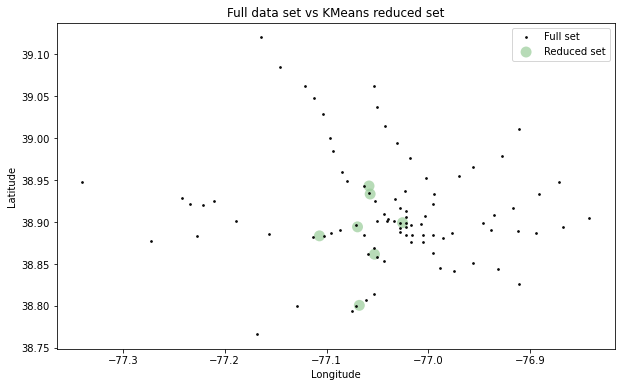

In [ ]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rep_points_entry['lon'], rep_points_entry['lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(slist_df['lon'], slist_df['lat'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs KMeans reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

In [ ]:
# centermost_points_entry = pd.DataFrame(columns = ['lat', 'lon'])
# Check if chart_studio is installed
import sys
'chart_studio' in sys.modules
# False == not installed

False

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=f0c674a779f47887409a15f84eb38c032192a7aec5c5c10d817271f2f01ba8e8
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import chart_studio.plotly as py
from plotly.tools import FigureFactory as ff
from chart_studio import tools as tl

tl.set_credentials_file(username='aryapriyank', api_key='B9gB3B6AJrR8OgtXFSTz')
newdata = rep_points_entry.iloc[0:, [1,0]]
table = ff.create_table(newdata)
py.iplot(table, filename='Plot station points on gmap')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:592: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



In [ ]:
import plotly.graph_objs as go

mapbox_access_token = 'pk.eyJ1IjoiYXJ5YXByaXlhbmsiLCJhIjoiY2wxYjZsbndmMnBjMjNicHd1NWJkems0YiJ9.hSO-JZ6PtffZ5gzsNdTlCw'

site_lat = rep_points_entry.lat
site_lon = rep_points_entry.lon
# locations_name = slist.NAME

data_for_entry_map = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=3,
            color='rgb(255, 0, 0)',
            opacity=1
        ),
        # text=locations_name,
        hoverinfo='text'
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=8,
            color='rgb(34, 139, 34)',
            opacity=0.8
        ),
        hoverinfo='none'
    )]



layout_for_entry_map = go.Layout(
    title='station plots',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38.9,
            lon=-77.1
        ),
        pitch=0,
        zoom=10,
        style='light'
    ),
)


# Generate the figure using the iplot function 
  
fig_entry = dict(data=data_for_entry_map, layout=layout_for_entry_map)
py.iplot(fig_entry, filename='Plot station points on gmap')

# Exit DBSCAN

In [ ]:
# DBSCAN 

""" FOR EXIT COUNT """

import matplotlib.pyplot as plt
from sklearn import cluster
# from geopy.distance import great_circle
# from shapely.geometry import Point

coords_for_exit = exit_data_slist.loc[:,["lat","lon"]]
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = cluster.DBSCAN(eps=epsilon, min_samples=370, algorithm='ball_tree', metric='haversine').fit(np.radians(coords_for_exit))
cluster_labels = db.labels_
range_cluster_labels = np.unique(cluster_labels)
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords_for_exit[cluster_labels == n] for n in range_cluster_labels])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 6


In [ ]:
coords_for_exit

,lat,lon
0,38.862971,-76.995373
0,38.862971,-76.995373
0,38.862971,-76.995373
0,38.862971,-76.995373
0,38.862971,-76.995373
...,...,...
90,38.947741,-77.340062
90,38.947741,-77.340062
90,38.947741,-77.340062
90,38.947741,-77.340062


In [ ]:
from typing import Tuple
def get_centermost_point(cluster):
    lat_mean, lon_mean = cluster.mean()
    centroid = []
    centroid.append(lat_mean)
    centroid.append(lon_mean)
    return tuple(centroid)

centermost_points = clusters.map(get_centermost_point)

# Print centroids
centermost_points

0     (38.93960127654791, -77.05991081063014)
1    (38.899064049273036, -77.02556616837381)
2    (38.933321813591554, -77.05720348772643)
3     (38.88354082488246, -77.10681049934176)
4     (38.86169366599018, -77.05316051848274)
5     (38.80083496547918, -77.06763472012194)
dtype: object

In [ ]:
lats, lons = zip(*centermost_points)
rep_points_exit = pd.DataFrame({'lon':lons, 'lat':lats})

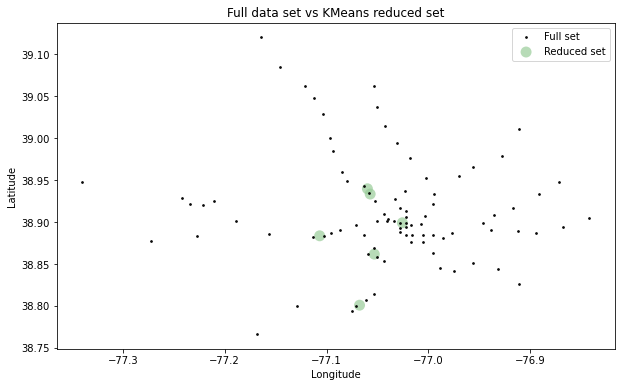

In [ ]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rep_points_exit['lon'], rep_points_exit['lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(slist_df['lon'], slist_df['lat'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs KMeans reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

In [ ]:
newdata = rep_points_exit.iloc[0:, [1,0]]
table = ff.create_table(newdata)
py.iplot(table, filename='Plot station points on gmap')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:592: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



In [ ]:
site_lat = rep_points_exit.lat
site_lon = rep_points_exit.lon
# locations_name = slist.NAME

data_for_exit_map = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=3,
            color='rgb(255, 0, 0)',
            opacity=1
        ),
        # text=locations_name,
        hoverinfo='text'
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=8,
            color='rgb(242, 68, 55)',
            opacity=0.8
        ),
        hoverinfo='none'
    )]



layout_for_exit_map = go.Layout(
    title='station plots',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38.9,
            lon=-77.1
        ),
        pitch=0,
        zoom=10,
        style='light'
    ),
)


# Generate the figure using the iplot function 
  
fig_exit = dict(data=data_for_exit_map, layout=layout_for_exit_map)
py.iplot(fig_exit, filename='Plot station points on gmap')

# Scatter Plot DBSCAN

In [ ]:
import plotly.express as px
# px.set_mapbox_access_token(open(".mapbox_token").read())
px.set_mapbox_access_token(mapbox_access_token)

fig_entry_sc = px.scatter_mapbox(slist, lat="lat", lon="lon", color="STATION_ID", size="EXIT_COUNT",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig_entry_sc.show()

In [ ]:
fig_exit_sc = px.scatter_mapbox(slist, lat="lat", lon="lon", color="STATION_ID", size="EXIT_COUNT",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig_exit_sc.show()